<a href="https://colab.research.google.com/github/yaphetsyaphets/Machine_Learning/blob/main/Linear_Regression_Cost_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-02-20 13:54:44--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2024-02-20 13:54:44 (143 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df['sex'] = pd.factorize(df['sex'])[0]
df['smoker'] = pd.factorize(df['smoker'])[0]
df['region'] = pd.factorize(df['region'])[0]
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [ ]:
dataset = df
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


In [ ]:
test_data = dataset.sample(frac=0.2)
len(test_data)

268

In [ ]:
train_data = dataset[~dataset.isin(test_data)].dropna()
len(train_data)

1070

In [ ]:
train_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0.0,27.9,0.0,0.0,0.0,16884.92
1,18.0,1.0,33.8,1.0,1.0,1.0,1725.55
2,28.0,1.0,33.0,3.0,1.0,1.0,4449.46
3,33.0,1.0,22.7,0.0,1.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,1.0,2.0,3866.86


In [ ]:
test_data.head()

,age,sex,bmi,children,smoker,region,expenses
925,50,1,32.1,2,1,3,25333.33
237,31,1,38.4,2,1,1,4463.21
6,46,0,33.4,1,1,1,8240.59
202,60,0,24.0,0,1,2,13012.21
521,32,0,44.2,0,1,1,3994.18


In [ ]:
train_labels = train_data.pop('expenses')
train_labels.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [ ]:
test_labels = test_data.pop('expenses')
test_labels.head()

925    25333.33
237     4463.21
6       8240.59
202    13012.21
521     3994.18
Name: expenses, dtype: float64

In [ ]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_data))

model = keras.Sequential([
    normalizer,
    layers.Dense(64),
    layers.Dense(32),
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.1),
    layers.Dense(1),
])

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.2),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                        

In [ ]:
history = model.fit(
    train_data,
    train_labels,
    epochs=90,
    validation_split=0.3,
    verbose=0, # disable logging
)

print(history)

9/9 - 0s - loss: 3326.4077 - mae: 3326.4077 - mse: 36531044.0000 - 57ms/epoch - 6ms/step
Testing set Mean Abs Error: 3326.41 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


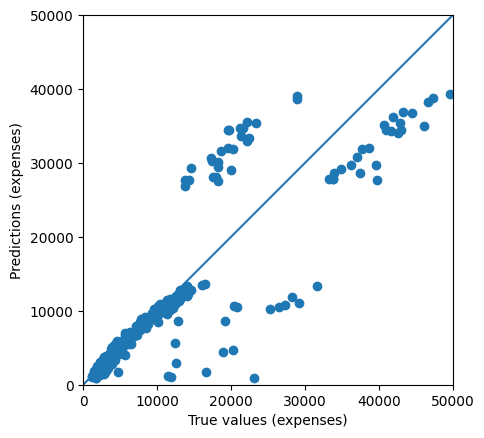

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)